In [46]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

# Load the race data
file_path = "/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/data/processed/processed_race_data_with_results.nc"
ds = xr.open_dataset(file_path)

# Convert to DataFrame for easier manipulation
df = ds.to_dataframe().reset_index()

# Drop rows with missing values
df = df.dropna(subset=['recent_finish_pos'])

# Print the shape of the dataframe to see how many samples we have
print(df.shape)

# Display all column names in the dataset
print("Column names in the dataset:")
print(df.columns.tolist())

# Count the number of variables
print(f"\nTotal number of variables: {len(df.columns)}")

# Optionally, categorize variables by type
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumeric variables ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\nCategorical variables ({len(categorical_cols)}):")
print(categorical_cols)

print("\nNumber of distinct values:")
print(f"surface: {df['surface'].nunique()}")
print(f"jockey: {df['jockey'].nunique()}")
print(f"trainer: {df['trainer'].nunique()}")
print(f"horse: {df['horse'].nunique()}")
# Extract the last two characters from race IDs to convert them to numerical data
# Example: "CD-05-02-23-R01" -> "01" -> 1
print("\nConverting race IDs to numerical values...")
# First, check if the race column contains the expected format
print(f"Sample race IDs: {df['race'].head().tolist()}")
    
# Extract the last two characters and convert to integers
df['race_num'] = df['race'].str[-2:].astype(int)
#1F = 200m
df['distance'] = df['distance_f']*200.0 

# Verify the conversion
print("\nAfter conversion:")
print(df[['race', 'race_num']].head())
print(f"Unique race numbers: {sorted(df['race_num'].unique())}")

# We'll use race_num instead of race in our model

df.head(-5)



(6861, 25)
Column names in the dataset:
['race', 'starter', 'past_race', 'horse', 'jockey', 'trainer', 'program_number', 'surface', 'distance_f', 'purse', 'recent_race_id', 'recent_finish_pos', 'recent_lengths_back_finish', 'recent_lengths_back_last_call', 'recent_last_call_pos', 'recent_surface', 'recent_distance', 'recent_date', 'recent_purse', 'recent_start_pos', 'recent_num_starters', 'recent_jockey', 'recent_trainer', 'finish_position', 'scratched']

Total number of variables: 25

Numeric variables (13):
['starter', 'past_race', 'distance_f', 'purse', 'recent_finish_pos', 'recent_lengths_back_finish', 'recent_lengths_back_last_call', 'recent_last_call_pos', 'recent_distance', 'recent_purse', 'recent_start_pos', 'recent_num_starters', 'finish_position']

Categorical variables (11):
['race', 'horse', 'jockey', 'trainer', 'program_number', 'surface', 'recent_race_id', 'recent_surface', 'recent_date', 'recent_jockey', 'recent_trainer']

Number of distinct values:
surface: 2
jockey: 85

,race,starter,past_race,horse,jockey,trainer,program_number,surface,distance_f,purse,...,recent_date,recent_purse,recent_start_pos,recent_num_starters,recent_jockey,recent_trainer,finish_position,scratched,race_num,distance
0,CD-05-02-23-R01,0,0,Gormleyesque,Rodriguez,Catalano,1,D,7.0,30000.0,...,2023-04-19,43000.0,1,11,Peterson,Catalano,2,False,1,1400.0
1,CD-05-02-23-R01,0,1,Gormleyesque,Rodriguez,Catalano,1,D,7.0,30000.0,...,2023-03-25,70000.0,1,11,Loveberry,Catalano,2,False,1,1400.0
2,CD-05-02-23-R01,0,2,Gormleyesque,Rodriguez,Catalano,1,D,7.0,30000.0,...,2023-02-15,70000.0,7,12,Mojica,Catalano,2,False,1,1400.0
3,CD-05-02-23-R01,0,3,Gormleyesque,Rodriguez,Catalano,1,D,7.0,30000.0,...,2022-08-04,105000.0,4,9,Saez,Catalano,2,False,1,1400.0
5,CD-05-02-23-R01,1,0,Kentucky Reign,Navas,Colebrook,2,D,7.0,30000.0,...,2023-04-19,100000.0,6,12,Navas,Colebrook,3,False,1,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20531,CD-05-29-23-R09,12,1,First Hill,Landeros,Medina,13,T,9.0,120000.0,...,2023-04-20,54000.0,5,6,Landeros,Medina,0,True,9,1800.0
20532,CD-05-29-23-R09,12,2,First Hill,Landeros,Medina,13,T,9.0,120000.0,...,2023-03-09,32000.0,6,12,Landeros,Medina,0,True,9,1800.0
20533,CD-05-29-23-R09,12,3,First Hill,Landeros,Medina,13,T,9.0,120000.0,...,2023-02-16,30000.0,1,10,Landeros,Medina,0,True,9,1800.0
20534,CD-05-29-23-R09,12,4,First Hill,Landeros,Medina,13,T,9.0,120000.0,...,2023-01-13,33000.0,4,7,Talamo,Cox,0,True,9,1800.0


In [47]:
# First, let's define our target variable and features
target_col = 'recent_finish_pos'
y = df[target_col].values

# Only keep specific numeric features
numeric_features = ['race_num', 'purse','distance']

# Categorical features to convert to numeric
categorical_features = [
    'horse', 'surface', 'trainer', 'jockey'
]

# Create a copy of the dataframe with only the features we need
model_df = df[numeric_features + categorical_features].copy()

# Convert surface to numeric (1 and 2)
surface_mapping = {surface: i+1 for i, surface in enumerate(model_df['surface'].unique())}
model_df['surface'] = model_df['surface'].map(surface_mapping)

# Convert horse names to numeric IDs with unique numbers between 1 and 100000
import random
random.seed(42)  # For reproducibility
horse_names = model_df['horse'].unique()
# Generate a list of unique random numbers
unique_ids = random.sample(range(1, 9999), len(horse_names))
# Create mapping dictionary with each horse getting a unique ID
horse_mapping = {horse: unique_ids[i] for i, horse in enumerate(horse_names)}
model_df['horse'] = model_df['horse'].map(horse_mapping)

# Convert jockey names to numeric IDs with unique numbers between 100000 and 199999
jockey_names = model_df['jockey'].unique()
# Generate a list of unique random numbers for jockeys
jockey_unique_ids = random.sample(range(1, 99), len(jockey_names))
# Create mapping dictionary with each jockey getting a unique ID
jockey_mapping = {jockey: jockey_unique_ids[i] for i, jockey in enumerate(jockey_names)}
model_df['jockey'] = model_df['jockey'].map(jockey_mapping)

# Convert trainer names to numeric IDs with unique numbers between 200000 and 299999
trainer_names = model_df['trainer'].unique()
# Generate a list of unique random numbers for trainers
trainer_unique_ids = random.sample(range(1, 999), len(trainer_names))
# Create mapping dictionary with each trainer getting a unique ID
trainer_mapping = {trainer: trainer_unique_ids[i] for i, trainer in enumerate(trainer_names)}
model_df['trainer'] = model_df['trainer'].map(trainer_mapping)

# Save the jockey mapping as CSV
jockey_mapping_df = pd.DataFrame(list(jockey_mapping.items()), columns=['jockey_name', 'jockey_id'])
jockey_mapping_df.to_csv('/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/jockey_mapping.csv', index=False)
print(f"Jockey mapping saved as CSV with {len(jockey_mapping)} entries")

# Save the trainer mapping as CSV
trainer_mapping_df = pd.DataFrame(list(trainer_mapping.items()), columns=['trainer_name', 'trainer_id'])
trainer_mapping_df.to_csv('/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/trainer_mapping.csv', index=False)
print(f"Trainer mapping saved as CSV with {len(trainer_mapping)} entries")

# Save jockey and trainer mappings as pickle files
with open('jockey_mapping.pkl', 'wb') as f:
    pickle.dump(jockey_mapping, f)

with open('trainer_mapping.pkl', 'wb') as f:
    pickle.dump(trainer_mapping, f)




# Save the horse mapping as CSV
import pandas as pd
horse_mapping_df = pd.DataFrame(list(horse_mapping.items()), columns=['horse_name', 'horse_id'])
horse_mapping_df.to_csv('/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/horse_mapping.csv', index=False)
print(f"Horse mapping saved as CSV with {len(horse_mapping)} entries")

# Also save as pickle for compatibility with existing code
import pickle
with open('horse_mapping.pkl', 'wb') as f:
    pickle.dump(horse_mapping, f)

# Save the surface mapping as CSV and pickle
surface_mapping_df = pd.DataFrame(list(surface_mapping.items()), columns=['surface_type', 'surface_id'])
surface_mapping_df.to_csv('/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/surface_mapping.csv', index=False)
print(f"Surface mapping saved as CSV with {len(surface_mapping)} entries")

with open('surface_mapping.pkl', 'wb') as f:
    pickle.dump(surface_mapping, f)

# Get the feature matrix X
X = model_df.values

# Use all data for training (no train/test split)
X_train = X
y_train = y

print(f"Training data shape: {X_train.shape}")

# Normalize numeric features for better model performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()

# Only scale the numeric features (first len(numeric_features) columns)
X_train_scaled[:, :len(numeric_features)] = scaler.fit_transform(X_train[:, :len(numeric_features)])

print("Data preparation complete. Ready for BART model training.")
# Print the X_train_scaled array



Jockey mapping saved as CSV with 85 entries
Trainer mapping saved as CSV with 260 entries
Horse mapping saved as CSV with 1420 entries
Surface mapping saved as CSV with 2 entries
Training data shape: (6861, 7)
Data preparation complete. Ready for BART model training.


In [48]:
# Import necessary libraries for BART model
import pymc as pm
import pymc_bart as pmb
import arviz as az
import matplotlib.pyplot as plt

# Set up the BART model
print("Setting up the BART model...")

# Define model parameters
n_trees = 50  # Number of trees in the ensemble
n_chains = 2  # Number of MCMC chains
n_draws = 1000  # Number of samples to draw

# Create the BART model using PyMC
with pm.Model() as bart_model:
    # Define the BART model for regression
    μ = pmb.BART(
        "μ", 
        X_train_scaled, 
        y_train, 
        m=n_trees,  # Number of trees
    )
    
    # Define the likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=pm.HalfNormal("sigma", 1), observed=y_train)
    
    # Sample from the posterior
    print("Sampling from the posterior distribution...")
    trace = pm.sample(
        draws=n_draws,
        chains=n_chains,
        tune=500,  # Number of tuning steps
        return_inferencedata=True,
        target_accept=0.95,
    )



Setting up the BART model...
Sampling from the posterior distribution...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [sigma]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 22 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling: [μ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Loading prediction dataset...
Preparing prediction data...
Making predictions...


Prediction results:
   mean_prediction  median_prediction  lower_95  upper_95  race_num  \
0         5.476465           5.475297  5.053219  5.930289       1.0   
1         5.477527           5.478658  5.072874  5.923707       1.0   
2         5.499478           5.497889  5.093868  5.932124       1.0   
3         5.427545           5.423130  4.984419  5.878007       1.0   
4         5.532398           5.534015  5.092187  5.953110       1.0   

         horse_name  horse_id surface_code  surface_id jockey_name  \
0          BALLADRY    6562.0            D         1.0       ROCCO   
1  WHERE'S THE WINE    6736.0            D         1.0   LOVEBERRY   
2  PRINCESS POM POM    4804.0            D         1.0     LANERIE   
3        ASK AMANDA    5051.0            D         1.0     PEDROZA   
4      SPIRIT RULES    5296.0            D         1.0        SAEZ   

  trainer_name  
0        PITTS  
1     CATALANO  
2      FORSTER  
3       BAHENA  
4   SANTAMARIA  


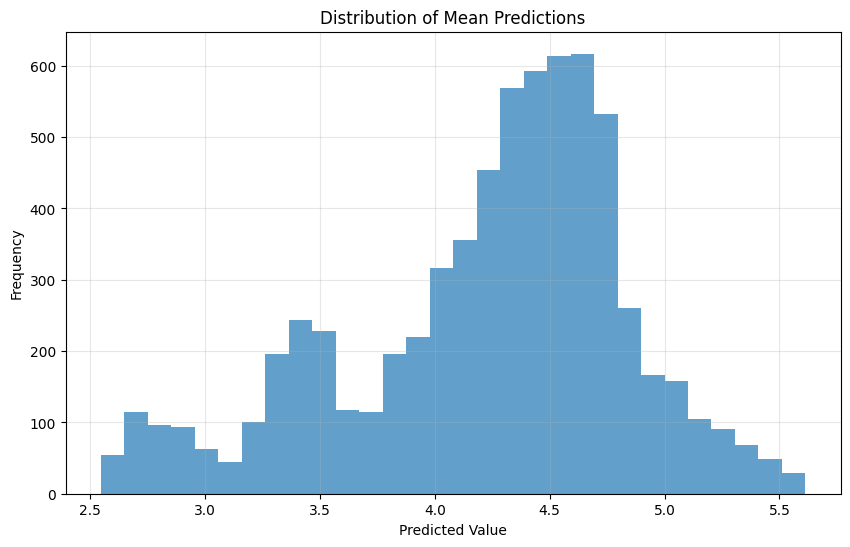

Predictions saved to bart_predictions.csv


In [49]:
# Load the prediction dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Loading prediction dataset...")
pred_data = pd.read_csv("features_dataset_0515.csv")

# Prepare prediction data
print("Preparing prediction data...")

# Select features that match our training data structure
X_pred = pred_data[['race_num','purse','distance','horse_id', 'surface_id','trainer_id','jockey_id']].copy()

# Handle missing values
X_pred = X_pred.fillna(-1)  # Fill any missing values with -1

# Convert categorical features to numeric if needed
# (assuming we've already mapped jockey and trainer to their IDs)

# Convert to numpy array
X_pred_array = X_pred.values

# Scale the numeric features using the same scaler used for training
scaler = StandardScaler()
# First fit the scaler on training data if not already done
if 'X_train' in locals():
    numeric_indices = [0, 1]  # Indices of numeric features (horse_id, surface_id)
    scaler.fit(X_train[:, numeric_indices])
    
# Apply scaling to prediction data
X_pred_scaled = X_pred_array.copy()
X_pred_scaled[:, :2] = scaler.transform(X_pred_array[:, :2])  # Scale only numeric features

# Make predictions using the trained BART model
print("Making predictions...")
with bart_model:
    # Generate posterior predictive samples
    posterior_pred = pm.sample_posterior_predictive(
        trace,
        var_names=["μ"],
        random_seed=42
    )

# Extract the predictions
y_pred_samples = posterior_pred.posterior_predictive["μ"].values

# Calculate summary statistics of predictions
y_pred_mean = np.mean(y_pred_samples, axis=(0, 1))
y_pred_median = np.median(y_pred_samples, axis=(0, 1))
y_pred_lower = np.percentile(y_pred_samples, 2.5, axis=(0, 1))
y_pred_upper = np.percentile(y_pred_samples, 97.5, axis=(0, 1))

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'mean_prediction': y_pred_mean,
    'median_prediction': y_pred_median,
    'lower_95': y_pred_lower,
    'upper_95': y_pred_upper
})

# Add identifiers from the original prediction dataset
predictions_df['race_num'] = pred_data['race_num']
predictions_df['horse_name'] = pred_data['horse_name']
predictions_df['horse_id'] = pred_data['horse_id']
predictions_df['surface_code'] = pred_data['surface_code']
predictions_df['surface_id'] = pred_data['surface_id']
predictions_df['jockey_name'] = pred_data['jockey_name']
predictions_df['trainer_name'] = pred_data['trainer_name']

# Display the first few predictions
print("Prediction results:")
print(predictions_df.head())

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.hist(y_pred_mean, bins=30, alpha=0.7)
plt.title('Distribution of Mean Predictions')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Save the predictions to a CSV file
output_path = "bart_predictions.csv"
predictions_df.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")


Predictions for Race #4:
           horse_name  mean_prediction  lower_95  upper_95
30  INTERMITTENT FAST         5.547456  5.133897  6.025125
33  TENNESSEEHONEYBEE         5.226464  4.856703  5.597717
35     CAROLINA CANDY         5.036065  4.694994  5.420346
34        NO WHAT IFS         5.032538  4.690123  5.429187
36       UP THE CREEK         5.007913  4.657200  5.391041
31     I AM BEAUTIFUL         4.950153  4.603039  5.318705
32    SWEET SCORECARD         4.886825  4.522113  5.215460

Predictions for Race #5:
           horse_name  mean_prediction  lower_95  upper_95
43      PAVED IN GOLD         5.072149  4.663541  5.476438
41       ROCKET NIGHT         5.052284  4.660774  5.442178
39  MIDNIGHT SURVIVOR         5.045796  4.699163  5.408073
40             BAOBAB         5.036811  4.679856  5.392685
45       GHOST PRINCE         5.033843  4.686297  5.405146
42         STRATEGIST         5.003820  4.625895  5.406580
37           THRACIAN         5.000359  4.633608  5.395567
38  

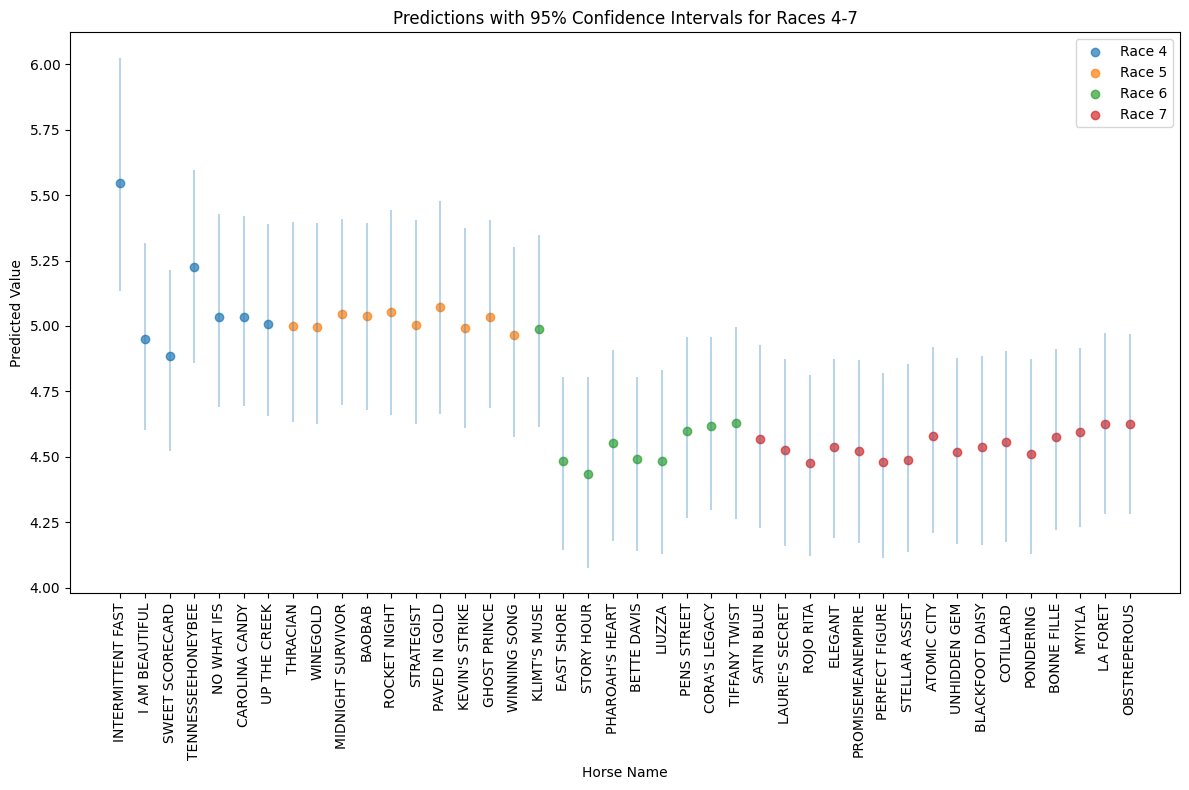


Horse with Lowest Position (Lowest Prediction Value) in Each Race:
Race #4: SWEET SCORECARD - Predicted Position: 4.89
Race #5: WINNING SONG - Predicted Position: 4.97
Race #6: STORY HOUR - Predicted Position: 4.44
Race #7: ROJO RITA - Predicted Position: 4.48


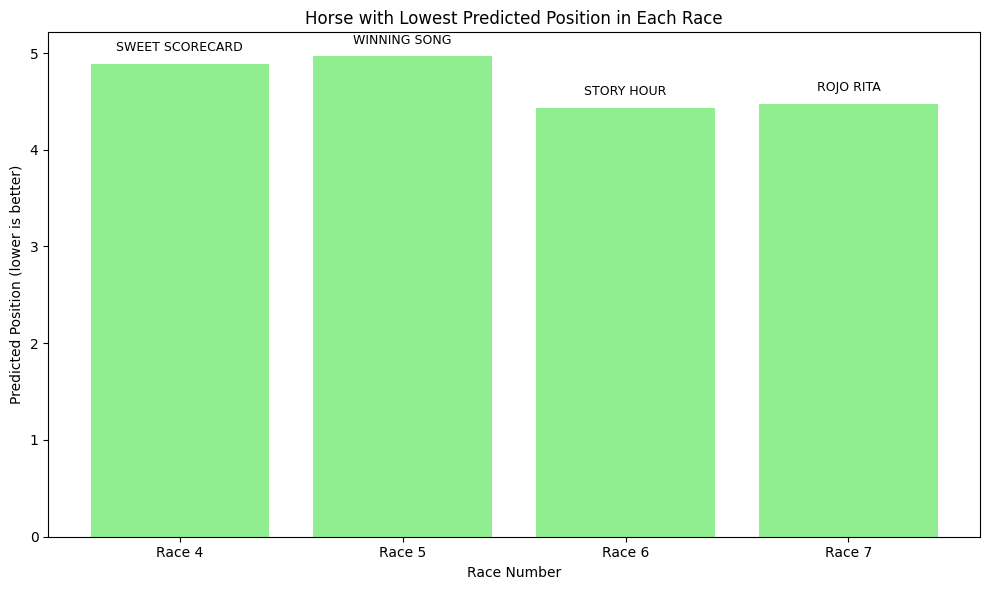

In [50]:
# Load the saved predictions
predictions_path = "/Users/jerry/Desktop/fsan830spring2025/students/Zhiyuan_Dong/bart_predictions.csv"
loaded_predictions = pd.read_csv(predictions_path)

# Filter and display predictions for race numbers 4, 5, 6, and 7
selected_races = [4, 5, 6, 7]
filtered_predictions = loaded_predictions[loaded_predictions['race_num'].isin(selected_races)]

# Group by race number and display results
for race_num in selected_races:
    race_data = filtered_predictions[filtered_predictions['race_num'] == race_num]
    if not race_data.empty:
        print(f"\nPredictions for Race #{race_num}:")
        print(race_data[['horse_name', 'mean_prediction', 'lower_95', 'upper_95']].sort_values(by='mean_prediction', ascending=False))
    else:
        print(f"\nNo predictions available for Race #{race_num}")

# Visualize predictions by race
plt.figure(figsize=(12, 8))
for race_num in selected_races:
    race_data = filtered_predictions[filtered_predictions['race_num'] == race_num]
    if not race_data.empty:
        plt.scatter(race_data['horse_name'], race_data['mean_prediction'], 
                   label=f'Race {race_num}', alpha=0.7)
        plt.errorbar(race_data['horse_name'], race_data['mean_prediction'],
                    yerr=[(race_data['mean_prediction'] - race_data['lower_95']), 
                          (race_data['upper_95'] - race_data['mean_prediction'])],
                    fmt='none', alpha=0.3)

plt.xticks(rotation=90)
plt.xlabel('Horse Name')
plt.ylabel('Predicted Value')
plt.title('Predictions with 95% Confidence Intervals for Races 4-7')
plt.legend()
plt.tight_layout()
plt.show()

# Find the horse with the lowest predicted position (lowest mean_prediction value) in each race
print("\nHorse with Lowest Position (Lowest Prediction Value) in Each Race:")
for race_num in selected_races:
    race_data = filtered_predictions[filtered_predictions['race_num'] == race_num]
    if not race_data.empty:
        # Find the horse with the lowest mean_prediction
        best_performer = race_data.loc[race_data['mean_prediction'].idxmin()]
        print(f"Race #{int(race_num)}: {best_performer['horse_name']} - Predicted Position: {best_performer['mean_prediction']:.2f}")
    else:
        print(f"Race #{race_num}: No predictions available")

# Create a bar chart showing the horse with lowest prediction in each race
plt.figure(figsize=(10, 6))
best_performers = []
best_positions = []
race_numbers = []

for race_num in selected_races:
    race_data = filtered_predictions[filtered_predictions['race_num'] == race_num]
    if not race_data.empty:
        best_idx = race_data['mean_prediction'].idxmin()
        best_performers.append(race_data.loc[best_idx, 'horse_name'])
        best_positions.append(race_data.loc[best_idx, 'mean_prediction'])
        race_numbers.append(f"Race {int(race_num)}")

# Create the bar chart
bars = plt.bar(race_numbers, best_positions, color='lightgreen')
plt.xlabel('Race Number')
plt.ylabel('Predicted Position (lower is better)')
plt.title('Horse with Lowest Predicted Position in Each Race')
plt.ylim(bottom=0)

# Add horse names as labels on top of each bar
for bar, horse in zip(bars, best_performers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             horse, ha='center', va='bottom', rotation=0, fontsize=9)

plt.tight_layout()
plt.show()




Winning Probabilities for Each Race (%):

Race #4:
SWEET SCORECARD: 17.30%
I AM BEAUTIFUL: 16.24%
UP THE CREEK: 15.33%
NO WHAT IFS: 14.96%
CAROLINA CANDY: 14.91%
TENNESSEEHONEYBEE: 12.32%
INTERMITTENT FAST: 8.94%

Race #5:
WINNING SONG: 10.56%
KEVIN'S STRIKE: 10.26%
WINEGOLD: 10.24%
THRACIAN: 10.19%
STRATEGIST: 10.16%
GHOST PRINCE: 9.86%
BAOBAB: 9.83%
MIDNIGHT SURVIVOR: 9.74%
ROCKET NIGHT: 9.68%
PAVED IN GOLD: 9.49%

Race #6:
STORY HOUR: 12.78%
LIUZZA: 12.17%
EAST SHORE: 12.16%
BETTE DAVIS: 12.10%
PHAROAH'S HEART: 11.38%
PENS STREET: 10.87%
CORA'S LEGACY: 10.66%
TIFFANY TWIST: 10.54%
KLIMT'S MUSE: 7.35%

Race #7:
ROJO RITA: 6.68%
PERFECT FIGURE: 6.65%
STELLAR ASSET: 6.62%
PONDERING: 6.45%
UNHIDDEN GEM: 6.41%
PROMISEMEANEMPIRE: 6.39%
LAURIE'S SECRET: 6.38%
BLACKFOOT DAISY: 6.29%
ELEGANT: 6.28%
COTILLARD: 6.18%
SATIN BLUE: 6.11%
BONNE FILLE: 6.06%
ATOMIC CITY: 6.03%
MYIYLA: 5.93%
LA FORET: 5.76%
OBSTREPEROUS: 5.75%


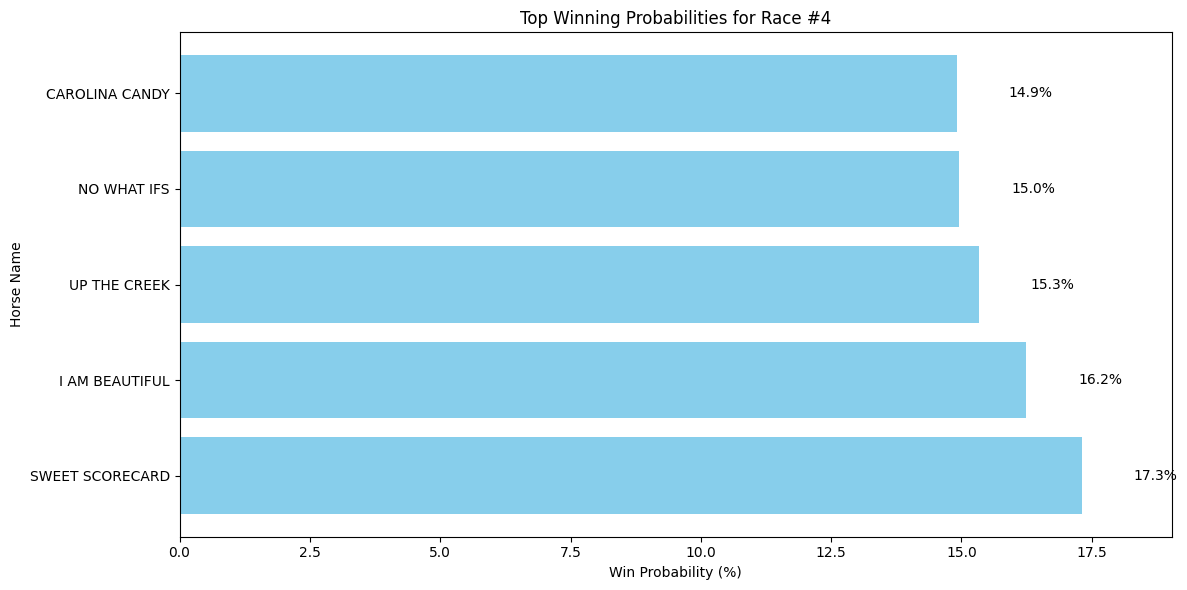

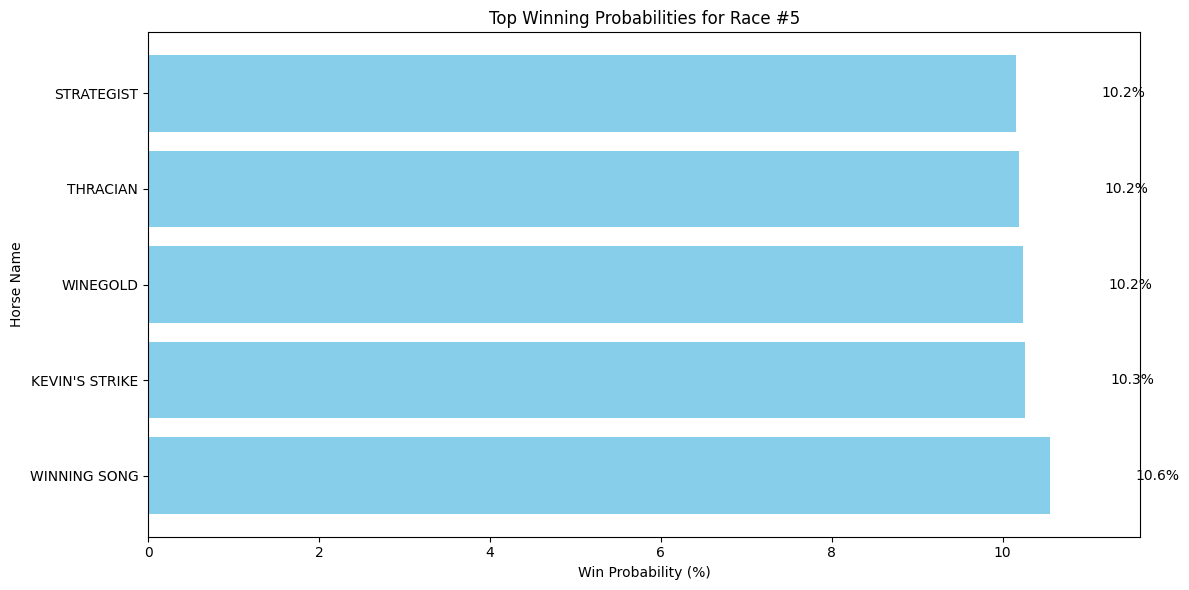

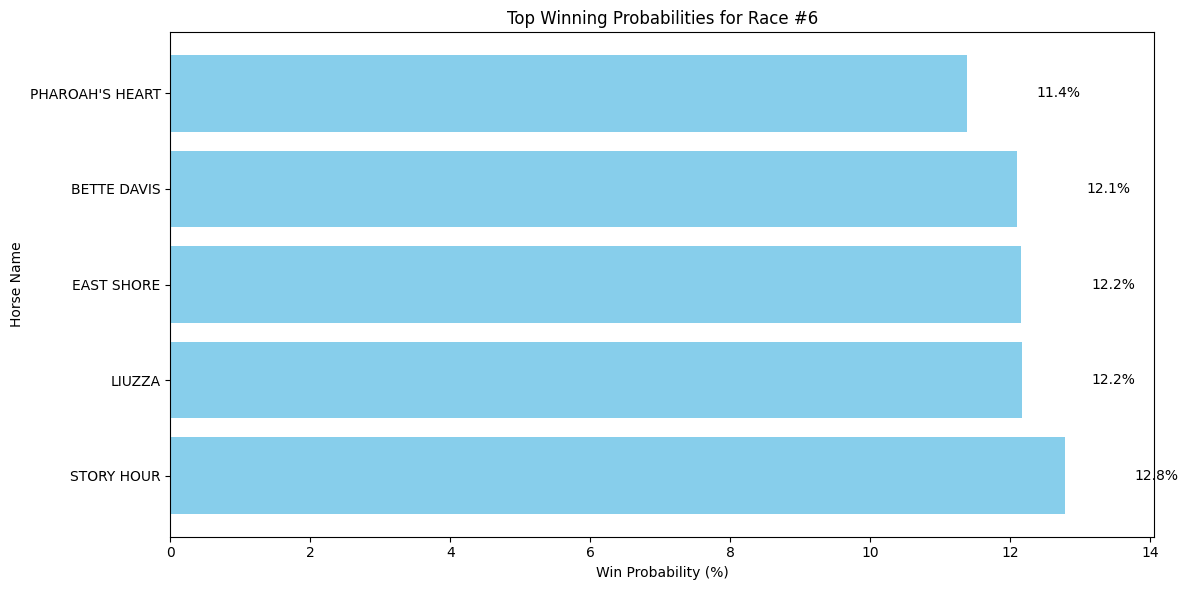

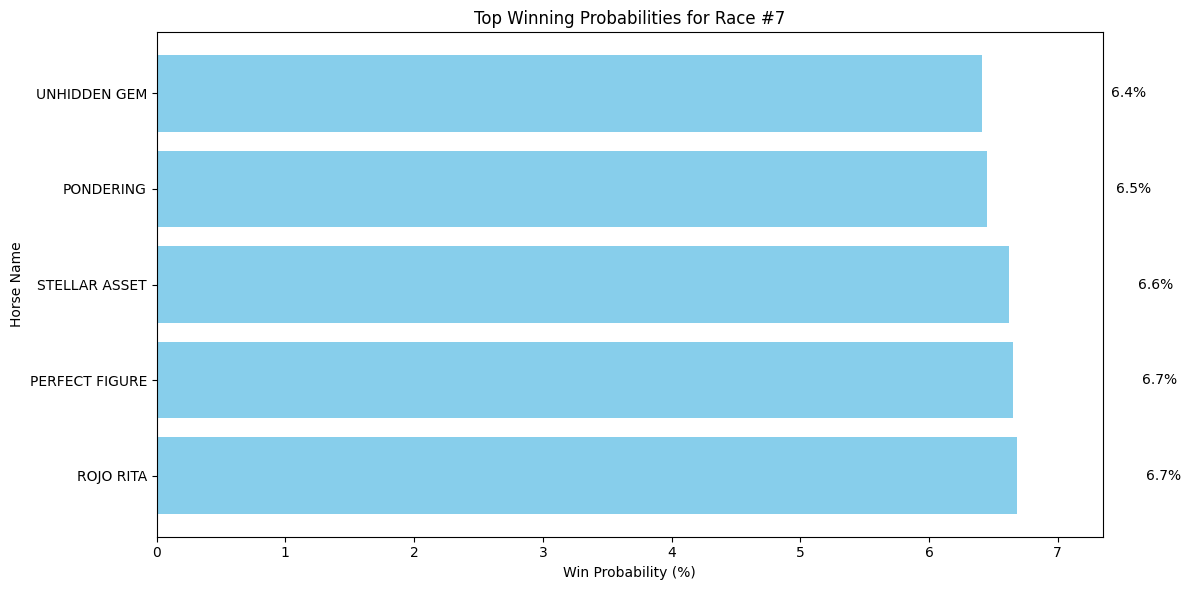

In [51]:
# Calculate winning probabilities using softmax function
import numpy as np
from scipy.special import softmax

# Group predictions by race
race_probabilities = {}
for race_num in selected_races:
    race_data = filtered_predictions[filtered_predictions['race_num'] == race_num]
    if not race_data.empty:
        # For softmax, we need to invert the predictions since lower position is better
        # We use negative values so that horses with lower predicted positions get higher probabilities
        inverted_predictions = -race_data['mean_prediction'].values
        win_probabilities = softmax(inverted_predictions)
        
        # Create a DataFrame with horse names and their winning probabilities
        prob_df = pd.DataFrame({
            'horse_name': race_data['horse_name'].values,
            'win_probability': win_probabilities * 100  # Convert to percentage
        })
        
        # Sort by probability (highest first)
        race_probabilities[race_num] = prob_df.sort_values('win_probability', ascending=False)

# Display winning probabilities for each race
print("\nWinning Probabilities for Each Race (%):")
for race_num, prob_df in race_probabilities.items():
    print(f"\nRace #{int(race_num)}:")
    for i, (_, row) in enumerate(prob_df.iterrows()):
        print(f"{row['horse_name']}: {row['win_probability']:.2f}%")

# Create bar charts showing winning probabilities for each race
for race_num, prob_df in race_probabilities.items():
    plt.figure(figsize=(12, 6))
    
    # Get top 5 horses (or all if less than 5)
    top_horses = prob_df.head(min(5, len(prob_df)))
    
    # Create horizontal bar chart
    bars = plt.barh(top_horses['horse_name'], top_horses['win_probability'], color='skyblue')
    
    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}%', ha='left', va='center')
    
    plt.xlabel('Win Probability (%)')
    plt.ylabel('Horse Name')
    plt.title(f'Top Winning Probabilities for Race #{int(race_num)}')
    plt.xlim(0, max(top_horses['win_probability']) * 1.1)  # Add some space for labels
    plt.tight_layout()
    plt.show()
